In [48]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy.stats import linregress
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [3]:
df = pd.read_csv(r"C:\\Users\\Deon\\Documents\\Data Analysis Project\\StudentPerformanceFactors.csv")

In [4]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
columns_with_nan_values = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
columns_with_nan_values

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

In [19]:
#checking for outliers as no one can score above 100 in an exams
df[df["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1524,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [29]:
df.drop(1521, inplace= True)
df.reset_index(drop= True, inplace= True)

In [30]:
df[df["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [31]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"\033[31m{'*'*20} {i.upper()}{'*'*20}\033[30m ")
        print(df[i].value_counts())
        print()

******************** PARENTAL_INVOLVEMENT******************** 
Parental_Involvement
Medium    3359
High      1907
Low       1335
Name: count, dtype: int64

******************** ACCESS_TO_RESOURCES******************** 
Access_to_Resources
Medium    3314
High      1975
Low       1312
Name: count, dtype: int64

******************** EXTRACURRICULAR_ACTIVITIES******************** 
Extracurricular_Activities
Yes    3936
No     2665
Name: count, dtype: int64

******************** MOTIVATION_LEVEL******************** 
Motivation_Level
Medium    3348
Low       1935
High      1318
Name: count, dtype: int64

******************** INTERNET_ACCESS******************** 
Internet_Access
Yes    6103
No      498
Name: count, dtype: int64

******************** FAMILY_INCOME******************** 
Family_Income
Low       2670
Medium    2663
High      1268
Name: count, dtype: int64

******************** TEACHER_QUALITY******************** 
Teacher_Quality
Medium    3999
High      1945
Low        657
Name: cou

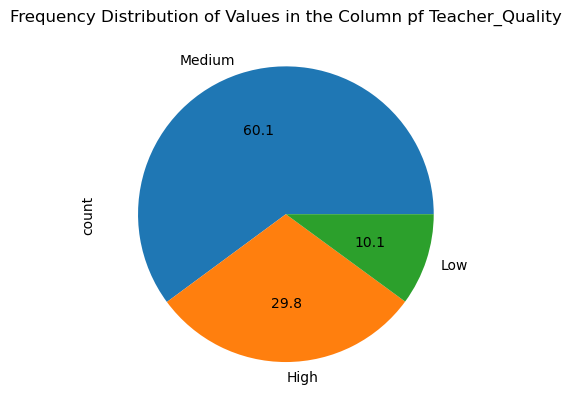

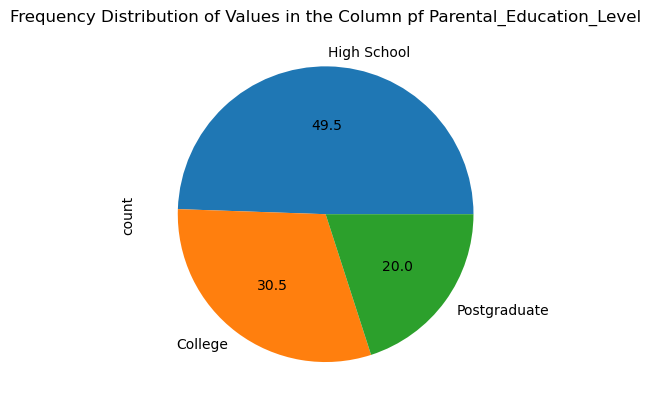

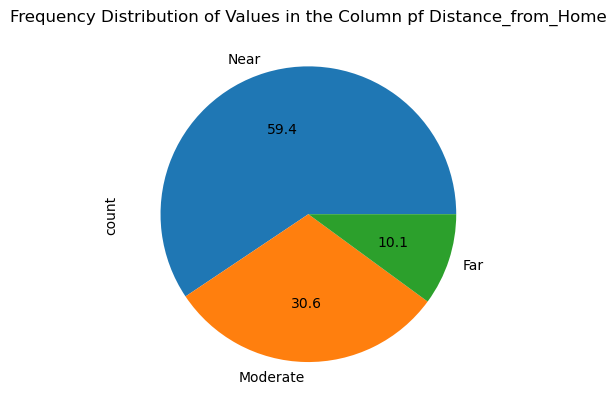

In [7]:
for column in columns_with_nan_values:
    df[column].value_counts().plot(kind='pie',autopct='%.1f')
    plt.title('Frequency Distribution of Values in the Column pf '+str(column))
    plt.show()

In [8]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')  # Ensure no trailing space


In [9]:
df['Parental_Education_Level']= df['Parental_Education_Level'].fillna('High School')

In [10]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Near')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [35]:
catergorical_columns = [ 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender']

In [36]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')